In [1]:
!pip install --upgrade diffusers[torch]
!pip install --upgrade diffusers[flax]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 22.9 MB/s eta 0:00:00


推理

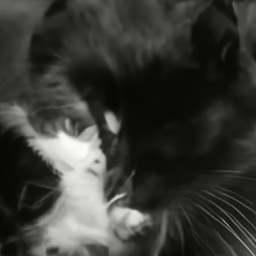

In [4]:
from diffusers import DDPMScheduler, UNet2DModel
from PIL import Image
import torch

scheduler = DDPMScheduler.from_pretrained("google/ddpm-cat-256")
model = UNet2DModel.from_pretrained("google/ddpm-cat-256").to("cuda")
scheduler.set_timesteps(50)

sample_size = model.config.sample_size
noise = torch.randn((1, 3, sample_size, sample_size), device="cuda")
input = noise

for t in scheduler.timesteps:
    with torch.no_grad():
        noisy_residual = model(input, t).sample
        prev_noisy_sample = scheduler.step(noisy_residual, t, input).prev_sample
        input = prev_noisy_sample

image = (input / 2 + 0.5).clamp(0, 1)
image = image.cpu().permute(0, 2, 3, 1).numpy()[0]
image = Image.fromarray((image * 255).round().astype("uint8"))
image

In [15]:
def print_emb_shape(module_name, module, input, output):
    # 打印 emb 的形状
    emb = input[0]  # 假设 emb 是 forward 方法的第二个输入
    output = output[0]
    print(f"Shape of emb inside the forward pass of {module_name}:", emb.shape)
    print(f"Shape of output inside the forward pass of {module_name}:", output.shape)
def print_mid_shape(module_name, module, input, output):
    # 打印 emb 的形状
    emb = input[0]  # 假设 emb 是 forward 方法的第二个输入
    output = output[0]
    print(f"Shape of emb inside the forward pass of {module_name}:", emb.shape)
    print(f"Shape of output inside the forward pass of {module_name}:", output.shape)

In [ ]:

from diffusers import DDPMScheduler, UNet2DModel
from PIL import Image
import torch

scheduler = DDPMScheduler.from_pretrained("google/ddpm-cat-256")
model = UNet2DModel.from_pretrained("google/ddpm-cat-256").to("cuda")
# 在 time_proj 和 time_embedding 层上注册钩子
hook_time_proj = model.time_proj.register_forward_hook(lambda module, input, output: print_emb_shape("time_proj", module, input, output))
hook_time_embedding = model.time_embedding.register_forward_hook(lambda module, input, output: print_emb_shape("time_embedding", module, input, output))


scheduler.set_timesteps(50)

sample_size = model.config.sample_size
noise = torch.randn((1, 3, sample_size, sample_size), device="cuda")
input = noise

for t in scheduler.timesteps:
    with torch.no_grad():
        noisy_residual = model(input, t).sample
        prev_noisy_sample = scheduler.step(noisy_residual, t, input).prev_sample
        input = prev_noisy_sample

image = (input / 2 + 0.5).clamp(0, 1)
image = image.cpu().permute(0, 2, 3, 1).numpy()[0]
image = Image.fromarray((image * 255).round().astype("uint8"))
image

In [2]:
from diffusers import DDPMScheduler


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [ ]:
import diffusers
dir(diffusers)

In [ ]:
from diffusers import DDPMScheduler, UNet2DModel
from PIL import Image
import torch

scheduler = DDPMScheduler.from_pretrained("google/ddpm-cat-256")
model = UNet2DModel.from_pretrained("google/ddpm-cat-256").to("cuda")
scheduler.set_timesteps(50)

sample_size = model.config.sample_size
noise = torch.randn((1, 3, sample_size, sample_size), device="cuda")
input = noise

for t in scheduler.timesteps:
    with torch.no_grad():
        noisy_residual = model(input, t).sample
        prev_noisy_sample = scheduler.step(noisy_residual, t, input).prev_sample
        input = prev_noisy_sample

image = (input / 2 + 0.5).clamp(0, 1)
image = image.cpu().permute(0, 2, 3, 1).numpy()[0]
image = Image.fromarray((image * 255).round().astype("uint8"))
image